# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model).

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, flatten each image to create a 1D array with 784 elements.

* The fuck is EXPECTED API?!


### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
```

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.


In [168]:
from sklearn.datasets import fetch_openml
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin

In [11]:

# Fetch data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)


In [ ]:
p(y)*p() / p(y==j) = likelihood 

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
The parameters of the model are:
1. Prior , The probability of each digit(class) occuring: Calculated for each class by dividing the occurence of each class (sum(y[y==i]))  by the total number of labels len(y). Final equation will be [ sum(y[y==i]) / len(y)].
2. Liklihood , the probability of each pixel having the value it has in the input: We calculate the probability of each pixel  having value of 1, for each class,by summing the number of times a specific pixel had the value 1 and divide it by the total number of that class occuring. p(pixel == 1) = sum(X[y==j,pixel] ==1) / sum(y==digit), for each pixel in (0,784), for each digit in (0,9).

Probability of a pixel having value 0 is equal to 1 - p(digit==1).

Since the probability of an input belonging to a digit is calculated by : P(y=digitm, x=input) = likelihood * prior
We can calculate the probability of a given input belonging to each class and choose the class with the maximal likelihood.


Classification rule:
1. Calculate the probability of getting the input given each class. 
2. pick the class that recieved the highest probability.
3. classify input as that class.

To calculate the probability in (1) : p(y= class | x = input) = p(class) * p(x=input|y=class) / p(x = input|y= all classes)

p(class) is the  prior , which we calculate from the training set
p(x = input|y= all classes) is also calculated from the training set, since we know the probability of having 0 or 1 in each class (digit).



#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

Confusion matrix:

 [[ 881    0    6   12    1   39   21    1   20    2]
 [   0 1110    6    6    0   12    3    0   12    3]
 [  13   16  805   26   17    6   41    5   36    2]
 [   5   30   49  830    2   23    8   14   45   28]
 [   2    7    6    0  724    6   16    5   18  122]
 [  20   17    7  139   24  680   20    3   13   14]
 [  12   33   21    1   13   25  855    0    1    0]
 [   5   22    8    2   27    3    0  890   19   79]
 [  16   39   19   80   10   33    5    5  720   42]
 [   6   21    4    9   77    4    0   33   29  853]] 


Accuracy, calculated as sum of confusion matrix diagonal divided by total sum of confusion matrix: 0.83 


To optimize the 'binarize' hyperparameter, we would train the model with a range of values for that parameter, and calculate the accuracy of each value. finally, we would choose the value that maximizes the accuracy


<Figure size 640x480 with 0 Axes>

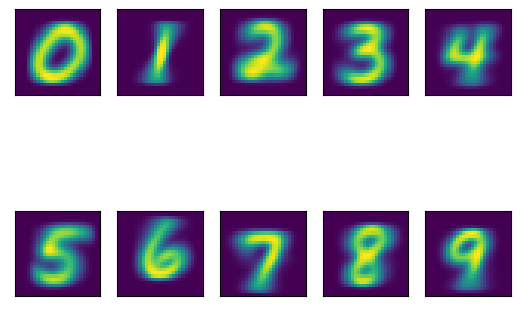

In [127]:
######## 1 ##########

# Create a BernoulliNB classifier
clf = BernoulliNB()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)








plt.figure();

### WITH feature_log_prob_

# Set the number of rows and columns for the subplots
nrows = 2
ncols = 5

# Create a figure and an array of subplots
fig, axes = plt.subplots(nrows, ncols);
# Use a for loop to plot the images
for i, ax in enumerate(axes.flat):

    # Plot the image and set the title
    ax.imshow(np.reshape(np.exp(clf.feature_log_prob_[i,:]),(28,28)));
    

# Remove the ticks from the plot
plt.setp(axes, xticks=[], yticks=[]);




##### 2 #######

cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion matrix:\n\n',cm,'\n\n')

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy, calculated as sum of confusion matrix diagonal divided by total sum of confusion matrix: {:.2f}".format(accuracy),'\n\n')


#### 3 ####

print("To optimize the 'binarize' hyperparameter, we would train the model with a range of values for that parameter, and calculate the accuracy of each value. finally, we would choose the value that maximizes the accuracy")




## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.



* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* Write a class `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`. If there are differences try to think why
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).

### Optional: Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words. 

Bonus: How can you correct the analyzed error? 

To read more about model interpretation, see the blogpost below and my tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [183]:
class NaiveBayes(BaseEstimator, ClassifierMixin):
  def fit(self, x, y):
    # Calculate the frequency of each label, and save it as a parameter of the object
    labels, label_freq = np.unique(x,return_counts=True)

    # Normalize label_freq so it would be probabilities
    self.label_freq = label_freq/len(y)
  def predict_log_proba(self, x):
    pass  
  def predict(self, x):
    pass


test = NaiveBayes()
test.fit(12,y)
test.label_freq

array([8.83860704e-05])

In [147]:
# Load data #
newsgroups_data = fetch_20newsgroups(subset='train',remove= ('headers', 'footers', 'quotes'))
X = newsgroups_data.data
y = newsgroups_data.target



In [166]:
# initialize the CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')


# fit the data to the vectorizer
vectorizer.fit(X)

count_matrix = vectorizer.transform(X)

count_matrix[1,5]




0

In [182]:
y

array([7, 4, 4, ..., 3, 1, 8])